In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.3.0-rc0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
img_width = 256
img_height = 256
batch_size = 10

In [3]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
train=pd.read_csv('train.csv')
train['Intersection'] = train.Intersection.astype(str)

In [4]:
train_generator = datagen.flow_from_dataframe(train,directory='C:/Users/HP/dphi/train/',
                                              x_col='file_name',y_col='Intersection',
                                              target_size = (img_width, img_height),
                                              class_mode = 'binary',
                                              class_color='greyscale',
                                              batch_size=batch_size,shuffle=True,subset="training")

Found 1154 validated image filenames belonging to 2 classes.


In [5]:
from scipy.stats import itemfreq
train_generator.classes
itemfreq(train_generator.classes)

<ipython-input-5-f10d5e11bb37>:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(train_generator.classes)


array([[  0, 479],
       [  1, 675]], dtype=int64)

In [6]:
val_generator = datagen.flow_from_dataframe(train,directory='C:/Users/HP/dphi/train/',
                                              target_size = (img_width, img_height),
                                              x_col='file_name',y_col='Intersection',
                                              class_mode = 'binary',
                                            class_color='greyscale',
                                              batch_size=batch_size,shuffle=True,subset="validation")

Found 288 validated image filenames belonging to 2 classes.


In [7]:
itemfreq(val_generator.classes)

<ipython-input-7-d5ccc276a7ee>:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(val_generator.classes)


array([[  0, 137],
       [  1, 151]], dtype=int64)

In [8]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = (img_width,img_height,3)))
#model.add(Dropout(0.2))
#model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 258064)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                16516160  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,516,673
Trainable params: 16,516,673
Non-trainable params: 0
____________________________________________

In [10]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=2,validation_data=val_generator,validation_steps=len(val_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
116/116 [==============================] - 47s 403ms/step - loss: 4.5868 - accuracy: 0.5572 - val_loss: 0.7373 - val_accuracy: 0.5243
Epoch 2/2
116/116 [==============================] - 40s 348ms/step - loss: 0.5820 - accuracy: 0.7071 - val_loss: 0.7697 - val_accuracy: 0.5694


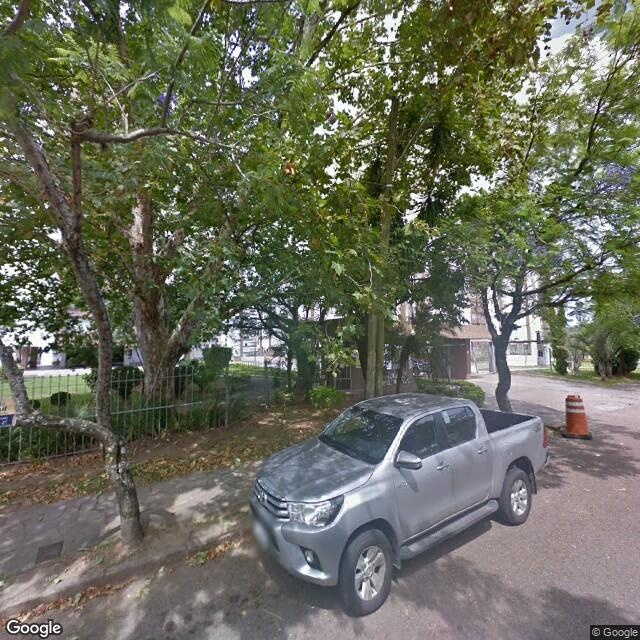

In [18]:
import cv2
from IPython import display
img = cv2.imread('C:/Users/HP/dphi/test/Image_1.jpg')

display.Image("C:/Users/HP/dphi/test/Image_1.jpg")


In [19]:
p

array([[1.]], dtype=float32)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test=pd.read_csv("test.csv")
test['Intersection']=train.Intersection.astype(str)

In [ ]:
test_generator = test_datagen.flow_from_dataframe(test,
    directory='C:/Users/HP/dphi/test/',
    target_size=(img_width, img_height),x_col='file_name', y_col='Intersection',class_mode ='binary',class_color='greyscale',batch_size=batch_size,shuffle=False,
    
)

In [ ]:
test_generator.reset()

In [ ]:
pred=model.predict_generator(test_generator,verbose=1,steps=len(test_generator))

In [23]:
pred

array([[0.5286393 ],
       [0.697536  ],
       [0.72722113],
       [0.63964224],
       [0.2823012 ],
       [0.7252676 ],
       [0.76637733],
       [0.48571277],
       [0.91637534],
       [0.74987614],
       [0.6611822 ],
       [0.40380928],
       [0.55679137],
       [0.5266898 ],
       [0.38326997],
       [0.6607435 ],
       [0.37354878],
       [0.30384207],
       [0.7534466 ],
       [0.21605584],
       [0.60259616],
       [0.63087344],
       [0.779453  ],
       [0.32443985],
       [0.4967988 ],
       [0.49116564],
       [0.7551317 ],
       [0.4140827 ],
       [0.29567486],
       [0.3640765 ],
       [0.6868143 ],
       [0.26872015],
       [0.49975023],
       [0.37855253],
       [0.28331518],
       [0.3777362 ],
       [0.7765256 ],
       [0.44343978],
       [0.46317396],
       [0.7580097 ],
       [0.34706306],
       [0.8307351 ],
       [0.40085903],
       [0.43277037],
       [0.41188335],
       [0.58257973],
       [0.673283  ],
       [0.619

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os

In [9]:
image=[256,256]
model = VGG16(input_shape=image+[3],weights='imagenet',include_top=False)

In [10]:
for layer in model.layers:
    layer.trainable=False

In [11]:
x=Flatten()(model.output)

In [12]:
predd=Dense(1,activation='sigmoid')(x)

In [13]:
m=tf.keras.Model(inputs=model.input,outputs=predd)

In [14]:
m.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)    

In [15]:
from tensorflow.keras.optimizers import RMSprop
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=m.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=val_generator,validation_steps=len(val_generator))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
116/116 [==============================] - 1351s 12s/step - loss: 1.6300 - accuracy: 0.5910 - val_loss: 0.9875 - val_accuracy: 0.6389
Epoch 2/5
116/116 [==============================] - 1329s 11s/step - loss: 0.5580 - accuracy: 0.8172 - val_loss: 0.9595 - val_accuracy: 0.6562
Epoch 3/5
116/116 [==============================] - 1333s 11s/step - loss: 0.1261 - accuracy: 0.9480 - val_loss: 1.7289 - val_accuracy: 0.5833
Epoch 4/5
 73/116 [=================>............] - ETA: 6:40 - loss: 0.0769 - accuracy: 0.9795

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('train_accuracy')>=0.99):
            print("\nReached 65% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
final=[]
for i in pred:
    for j in i:
        if j>0.5:
            final.append(1)
        else:
            final.append(0)

In [ ]:


results=pd.DataFrame({"prediction":final})

In [ ]:
results.to_csv(r'C:/Users/HP/dphi/pred16.csv',index=False)

In [33]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os

image=[64,64]
model = VGG19(input_shape=image+[3],weights='imagenet',include_top=False)

for layer in model.layers:
    layer.trainable=False

x=Flatten()(model.output)

predd=Dense(1,activation='sigmoid')(x)

m=tf.keras.Model(inputs=model.input,outputs=predd)

m.summary()

m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

80142336/80134624 [==============================] - 151s 2us/step
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_____________________________________________________

In [35]:
history=m.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=20,validation_data=val_generator,validation_steps=len(val_generator), callbacks=[callbacks])

Epoch 1/20
116/116 [==============================] - 36s 310ms/step - loss: 0.6773 - accuracy: 0.6005 - val_loss: 0.6441 - val_accuracy: 0.6250
Epoch 2/20
116/116 [==============================] - 34s 297ms/step - loss: 0.6415 - accuracy: 0.6447 - val_loss: 0.6535 - val_accuracy: 0.6181
Epoch 3/20
116/116 [==============================] - 35s 305ms/step - loss: 0.6172 - accuracy: 0.6716 - val_loss: 0.6350 - val_accuracy: 0.6493
Epoch 4/20
116/116 [==============================] - 36s 306ms/step - loss: 0.5970 - accuracy: 0.6872 - val_loss: 0.7180 - val_accuracy: 0.5521
Epoch 5/20
116/116 [==============================] - 30s 263ms/step - loss: 0.5861 - accuracy: 0.6802 - val_loss: 0.6546 - val_accuracy: 0.6181
Epoch 6/20
116/116 [==============================] - 31s 264ms/step - loss: 0.5735 - accuracy: 0.7149 - val_loss: 0.6726 - val_accuracy: 0.5972
Epoch 7/20
116/116 [==============================] - 31s 264ms/step - loss: 0.5637 - accuracy: 0.7071 - val_loss: 0.6849 - val_ac

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os

image=[256,256]
model = InceptionV3(input_shape=image+[3],weights='imagenet',include_top=False)

for layer in model.layers:
    layer.trainable=False

x=Flatten()(model.output)

predd=Dense(1,activation='sigmoid')(x)

m=tf.keras.Model(inputs=model.input,outputs=predd)

m.summary()

m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
history=m.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=10,validation_data=val_generator,validation_steps=len(val_generator))

Epoch 1/10
116/116 [==============================] - 77s 664ms/step - loss: 0.9536 - accuracy: 0.7972 - val_loss: 2.3928 - val_accuracy: 0.6285
Epoch 2/10
116/116 [==============================] - 87s 751ms/step - loss: 0.5434 - accuracy: 0.8761 - val_loss: 2.5140 - val_accuracy: 0.5799
Epoch 3/10
116/116 [==============================] - 91s 781ms/step - loss: 0.3251 - accuracy: 0.9194 - val_loss: 3.2614 - val_accuracy: 0.5486
Epoch 4/10
 10/116 [=>............................] - ETA: 58s - loss: 0.0609 - accuracy: 0.9787